In [3]:
# importing experiment data
import numpy as np
import pandas as pd
import ast
import math
import matplotlib.pyplot as plt
from scipy.stats import variation

df = pd.read_csv(r'/Users/rubi/Document/munashe_macbookpro_2_typingtask_2021_Jul_21_0950.csv')

FileNotFoundError: [Errno 2] File /Users/rubi/Documents/munashe_macbookpro_2_typingtask_2021_Jul_21_0950.csv does not exist: '/Users/rubi/Documents/munashe_macbookpro_2_typingtask_2021_Jul_21_0950.csv'

In [ ]:
# making data nicely usable
def pandas_data_to_columns(pandas):
    columns = list(pandas)
    data_by_column = {}

    KEYS_WITH_STR_ARRAYS = [
        'key_resp.keys',
        'key_resp.rt',
    ]

    max_len = 0

    for column in columns:
        array = []

        for row in pandas[column]:
            if row != row:
                continue
            else:
                if column in KEYS_WITH_STR_ARRAYS:
                    row_list = ast.literal_eval(row)
                    max_len = max(max_len, len(row_list))
                    array.append(row_list)
                else:
                    array.append(row)
        max_len = max(max_len, len(array))
        data_by_column[column] = np.array(array)

    bad_columns = []
    for column in data_by_column:
        if len(data_by_column[column]) != max_len:
            bad_columns.append(column)

    for bad_column in bad_columns:
        del data_by_column[bad_column]

    return data_by_column


def columns_to_trails(columns_data):
    trials = []
    number_of_trials = len(columns_data['string'])

    for trial_num in range(number_of_trials):
        trial = {}
        for column_label in columns_data:
            trial[column_label] = columns_data[column_label][trial_num]
        trials.append(trial)

    return trials

In [91]:
# experiment data structured nicely for column-based organization
column_based_data = pandas_data_to_columns(df)
# experiment data structured nicely for row-based organization
trial_based_data = columns_to_trails(column_based_data)


# making function to nicely print trial data
def print_trials(trials):
    for trial in trials:
        print(trial)

<ipython-input-90-1861e74127bf>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_by_column[column] = np.array(array)


In [2]:
print(trial_based_data)

NameError: name 'trial_based_data' is not defined

In [92]:
# labelling familiar and unfamiliar terms
mostfam_filter = lambda trial: trial['string'] in ['there', 'about', 'right', 'think', 'would', 'where']
mostfam_trials = list(filter(mostfam_filter, trial_based_data))

semifam_filter = lambda trial: trial['string'] in ['loyal', 'wagon', 'merry', 'motel', 'crawl', 'motor']
semifam_trials = list(filter(semifam_filter, trial_based_data))

unfam_filter = lambda trial: trial['string'] in ['unhat', 'wooer', 'yeses', 'crape', 'incan', 'noire']
unfam_trials = list(filter(unfam_filter, trial_based_data))

nofam_filter = lambda trial: trial['string'] in ['lumpo', 'reshy', 'blong', 'kremp', 'wovet', 'zarsh']
nofam_trials = list(filter(nofam_filter, trial_based_data))

In [93]:
# determining latency to first keypress in familiar vs unfamiliar words
print('keypress lat')
mostfam_delay = list(map(lambda trial: trial['key_resp.rt'][0], mostfam_trials))
mostfam_delayavg = np.mean(mostfam_delay)
print(mostfam_delayavg)

semifam_delay = list(map(lambda trial: trial['key_resp.rt'][0], semifam_trials))
semifam_delayavg = np.mean(semifam_delay)
print(semifam_delayavg)

unfam_delay = list(map(lambda trial: trial['key_resp.rt'][0], unfam_trials))
unfam_delayavg = np.mean(unfam_delay)
print(unfam_delayavg)

nofam_delay = list(map(lambda trial: trial['key_resp.rt'][0], nofam_trials))
nofam_delayavg = np.mean(nofam_delay)
print(nofam_delayavg)

keypress lat
0.8793786854161832
0.7473335972662123
0.9019904915259173
0.8958866958495492


In [94]:
print(mostfam_delay)
print(len(mostfam_delay))

[1.2134271670001908, 0.9305023340057232, 1.0384156669970253, 0.8897069160011597, 0.8424414170003729, 0.8611843329999829, 1.1297731670056237, 0.8129319170038798, 1.148761165997712, 0.9506959579957766, 1.0191487499978393, 1.038474667002447, 1.0978424170025392, 0.9334000419985387, 0.8127704580037971, 1.0407639580007526, 0.8911854999969364, 0.8504458340030396, 1.1105623330004164, 0.8778516659949673, 0.8257288749955478, 0.8964097499992931, 0.9935824580024928, 0.8040270419951412, 0.8956814590055728, 0.8514846250036499, 0.8706074580040877, 0.8667046659975313, 0.8239993750030408, 0.7916767080023419, -1.7421320830035256, 0.9886566249988391, 0.829553167000995, 0.8730992920027347, 0.8442997919992195, 1.3006881659966893, 0.9014411669995752, 0.806663874995138, 0.9868556660003378, 0.8628437909937929, 0.8472361250023823, 0.9939501659973757, 0.8266332499988494, 0.748779708002985, 1.0775268750003306, 0.7727586249966407, 0.9393941669986816, 1.1878417499974603, 0.8759675829933258, 0.8323321669959114, 0.8

Text(0.5, 1.0, 'Onset Delay by String Type')

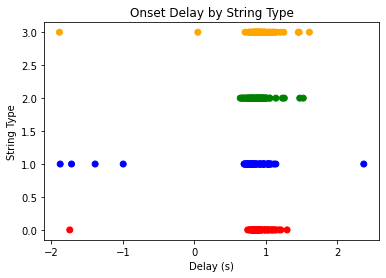

In [95]:
# plotting onset delay as scatter plot by string type without legend

plt.scatter(
    mostfam_delay + semifam_delay + unfam_delay + nofam_delay,
    [0] * len(mostfam_delay) + [1] * len(semifam_delay) + [2] * len(unfam_delay) + [3] * len(nofam_delay),
    c=['red'] * len(mostfam_delay) + ['blue'] * len(semifam_delay) + ['green'] * len(unfam_delay) + ['orange'] * len(nofam_delay),
)

plt.xlabel("Delay (s)")
plt.ylabel("String Type")
plt.title("Onset Delay by String Type")
# plt.show()

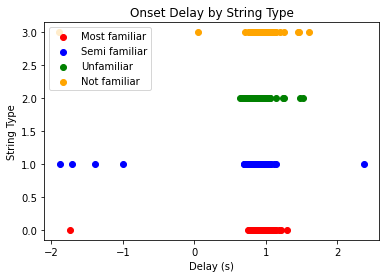

In [96]:
# plot onset delay times as scatter with legend
mostfam_delay_scatter = plt.scatter(mostfam_delay, [0] * len(mostfam_delay), c='red', label='Most familiar')
semifam_delay_scatter = plt.scatter(semifam_delay, [1] * len(semifam_delay), c='blue', label='Semi familiar')
unfam_delay_scatter = plt.scatter(unfam_delay, [2] * len(unfam_delay), c='green', label='Unfamiliar')
nofam_delay_scatter = plt.scatter(nofam_delay, [3] * len(nofam_delay), c='orange', label='Not familiar')

plt.xlabel("Delay (s)")
plt.ylabel("String Type")
plt.title("Onset Delay by String Type")
plt.legend(loc='upper left')

Text(0.5, 1.0, 'Onset Delay by String Type')

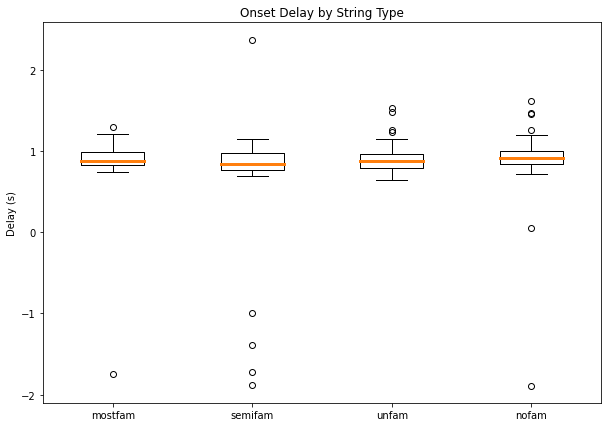

In [97]:
# plotting delay as box and whisker
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([ mostfam_delay, semifam_delay, unfam_delay, nofam_delay])

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

ax.set_xticklabels(['mostfam', 'semifam',
                    'unfam', 'nofam'])
for median in bp['medians']:
    median.set(linewidth = 3)

plt.xlabel("")
plt.ylabel("Delay (s)")
plt.title("Onset Delay by String Type")

In [98]:
# plotting delay avg as scatter
# plt.scatter(
#     [mostfam_delayavg, semifam_delayavg, unfam_delayavg, nofam_delayavg], [0, 0, 0, 0],
#     c=['red'] + ['blue'] + ['green'] + ['orange'])

In [99]:
# determining overall typing speed of familiar and unfamiliar terms
print('avg speeds')

mostfam_keyresp = list(map(lambda trial: trial['key_resp.rt'], mostfam_trials))
mostfam_speed = list(map(lambda trial: trial['key_resp.rt'][-1] - trial['key_resp.rt'][0], mostfam_trials))
mostfam_speedavg = np.mean(mostfam_speed)
print(mostfam_speedavg)

semifam_keyresp = list(map(lambda trial: trial['key_resp.rt'], semifam_trials))
semifam_speed = list(map(lambda trial: trial['key_resp.rt'][-1] - trial['key_resp.rt'][0], semifam_trials))
semifam_speedavg = np.mean(semifam_speed)
print(semifam_speedavg)

unfam_keyresp = list(map(lambda trial: trial['key_resp.rt'], unfam_trials))
unfam_speed = list(map(lambda trial: trial['key_resp.rt'][-1] - trial['key_resp.rt'][0], unfam_trials))
unfam_speedavg = np.mean(unfam_speed)
print(unfam_speedavg)

nofam_keyresp = list(map(lambda trial: trial['key_resp.rt'], nofam_trials))
nofam_speed = list(map(lambda trial: trial['key_resp.rt'][-1] - trial['key_resp.rt'][0], nofam_trials))
nofam_speedavg = np.mean(nofam_speed)
print(nofam_speedavg)

avg speeds
0.9002266735339314
1.2385709645334524
1.045766466135905
1.2713025409171679


Text(0.5, 1.0, 'Speed by String Type')

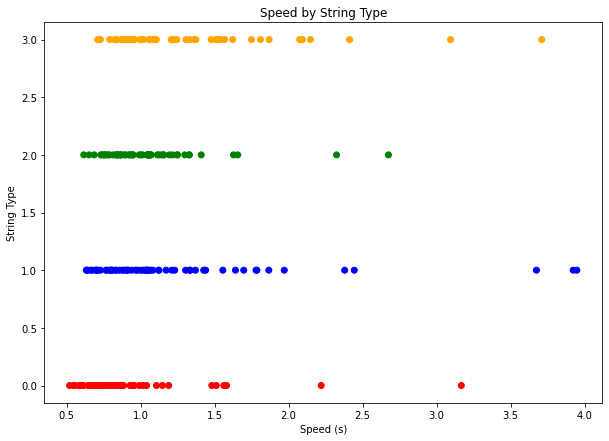

In [100]:
# plotting speed as scatter
plt.figure(figsize=(10, 7))
plt.scatter(
    mostfam_speed + semifam_speed + unfam_speed + nofam_speed,
    [0] * len(mostfam_speed) + [1] * len(semifam_speed) + [2] * len(unfam_speed) + [3] * len(nofam_speed),
    c=['red'] * len(mostfam_speed) + ['blue'] * len(semifam_speed) + ['green'] * len(unfam_speed) + ['orange'] * len(nofam_speed)
)

plt.xlabel("Speed (s)")
plt.ylabel("String Type")
plt.title("Speed by String Type")

Text(0.5, 1.0, 'Speed by String Type')

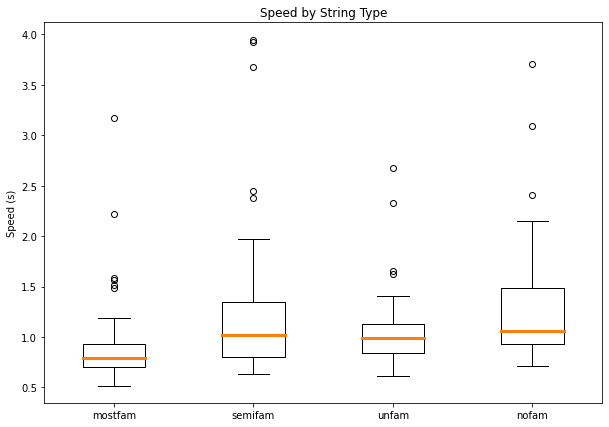

In [101]:
# plotting speeds as box and whisker
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([ mostfam_speed, semifam_speed, unfam_speed, nofam_speed])

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

ax.set_xticklabels(['mostfam', 'semifam',
                    'unfam', 'nofam'])
for median in bp['medians']:
    median.set(linewidth = 3)

plt.xlabel("")
plt.ylabel("Speed (s)")
plt.title("Speed by String Type")

# plt.show()

In [102]:
# determining digraph latencies for familiar vs unfamiliar terms
print('digraphs lats')

def inner_word_variance(word, trials):
    letter_dilats = []
    for trial in filter(lambda x: x['string'] == word and ''.join(x['key_resp.keys']) == x['string'], trials):
        dilat = np.diff(trial['key_resp.rt'])
        while len(letter_dilats) < len(dilat):
            letter_dilats.append([])
        for i in range(len(dilat)):
            letter_dilats[i].append(dilat[i])
    return [ variation(x) for x in letter_dilats ]

print(inner_word_variance('there', mostfam_trials))

def sequence_variance_averages(trials):
    words = np.unique(list(map(lambda x: x['string'], trials)))
    inner_word_variances = list(map(lambda word: inner_word_variance(word, trials), words))
    average_by_sequence = list(map(lambda x: np.average(x), np.transpose(np.array(inner_word_variances))))
    return average_by_sequence

mostfam_dilatavg = sequence_variance_averages(mostfam_trials)
semifam_dilatavg = sequence_variance_averages(semifam_trials)
unfam_dilatavg = sequence_variance_averages(unfam_trials)
nofam_dilatavg = sequence_variance_averages(nofam_trials)

print(mostfam_dilatavg)

mostfam_dilat = list(
    map(lambda trial: {'string': trial['string'], 'dilat': np.diff(trial['key_resp.rt'])}, mostfam_trials))

# mostfam_inner_word_variances = list(map(lambda word: inner_word_variance(word, mostfam_trials), mostfam))
# stuff = list(map(lambda x: np.average(x), np.transpose(np.array(mostfam_inner_word_variances))))
# print(mostfam_inner_word_variances)


digraphs lats
[0.19928158359222894, 0.1713216117858796, 0.08501741013073473, 0.0962115950981237]
[0.30321643816224114, 0.3248186947591316, 0.24190920262981508, 0.26521934364920585]


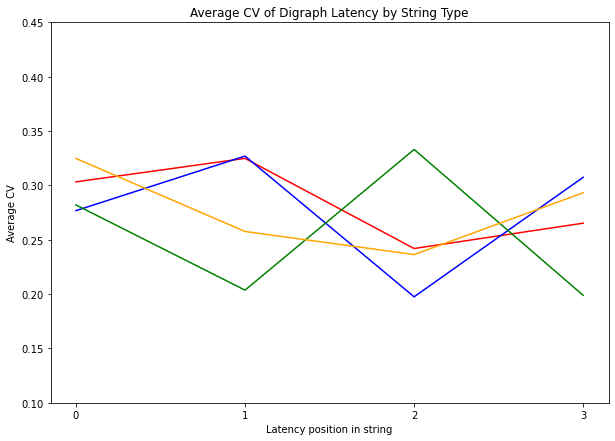

In [103]:
# plotting digraph latency variations with legend
x = [0, 1, 2, 3]
plt.figure(figsize=(10, 7))
plt.plot(x, mostfam_dilatavg, color='red')
plt.plot(x, semifam_dilatavg, color='blue')
plt.plot(x, unfam_dilatavg, color='green')
plt.plot(x, nofam_dilatavg, color='orange')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel("Latency position in string")
plt.ylabel("Average CV")
plt.ylim([0.1, 0.45])
plt.title("Average CV of Digraph Latency by String Type")

plt.show()

In [104]:
# determining error and edit distance for all words
print('errors for all words')

import editdistance as ed

mostfam_error = list(map(lambda trial: {'string': trial['string'], 'input': ''.join(trial['key_resp.keys']),
                                        'matches': trial['string'] == ''.join(trial['key_resp.keys']),
                                        'editdis': (ed.eval(trial['string'], ''.join(trial['key_resp.keys'])))},
                         mostfam_trials))
print(mostfam_error)

semifam_error = list(map(lambda trial: {'string': trial['string'], 'input': ''.join(trial['key_resp.keys']),
                                        'matches': trial['string'] == ''.join(trial['key_resp.keys']),
                                        'editdis': (ed.eval(trial['string'], ''.join(trial['key_resp.keys'])))},
                         semifam_trials))
print(semifam_error)

unfam_error = list(map(lambda trial: {'string': trial['string'], 'input': ''.join(trial['key_resp.keys']),
                                      'matches': trial['string'] == ''.join(trial['key_resp.keys']),
                                      'editdis': (ed.eval(trial['string'], ''.join(trial['key_resp.keys'])))},
                       unfam_trials))
print(mostfam_error)

nofam_error = list(map(lambda trial: {'string': trial['string'], 'input': ''.join(trial['key_resp.keys']),
                                      'matches': trial['string'] == ''.join(trial['key_resp.keys']),
                                      'editdis': (ed.eval(trial['string'], ''.join(trial['key_resp.keys'])))},
                       nofam_trials))
print(mostfam_error)

errors for all words
[{'string': 'where', 'input': 'where', 'matches': True, 'editdis': 0}, {'string': 'would', 'input': 'would', 'matches': True, 'editdis': 0}, {'string': 'about', 'input': 'about', 'matches': True, 'editdis': 0}, {'string': 'think', 'input': 'think', 'matches': True, 'editdis': 0}, {'string': 'there', 'input': 'there', 'matches': True, 'editdis': 0}, {'string': 'right', 'input': 'right', 'matches': True, 'editdis': 0}, {'string': 'about', 'input': 'about', 'matches': True, 'editdis': 0}, {'string': 'would', 'input': 'would', 'matches': True, 'editdis': 0}, {'string': 'right', 'input': 'right', 'matches': True, 'editdis': 0}, {'string': 'think', 'input': 'think', 'matches': True, 'editdis': 0}, {'string': 'there', 'input': 'there', 'matches': True, 'editdis': 0}, {'string': 'where', 'input': 'where', 'matches': True, 'editdis': 0}, {'string': 'would', 'input': 'would', 'matches': True, 'editdis': 0}, {'string': 'where', 'input': 'where', 'matches': True, 'editdis': 0}

In [105]:
# determining total error count for familiar vs unfamiliar terms
print('total error for fam vs unfam')

mostfam_totalerror = list(filter(lambda trial: not trial['matches'], mostfam_error))
print(mostfam_totalerror)
print(len(mostfam_totalerror))

semifam_totalerror = list(filter(lambda trial: not trial['matches'], semifam_error))
print(semifam_totalerror)
print(len(semifam_totalerror))

unfam_totalerror = list(filter(lambda trial: not trial['matches'], unfam_error))
print(unfam_totalerror)
print(len(unfam_totalerror))

nofam_totalerror = list(filter(lambda trial: not trial['matches'], nofam_error))
print(nofam_totalerror)
print(len(nofam_totalerror))

total error for fam vs unfam
[{'string': 'there', 'input': 'apethere', 'matches': False, 'editdis': 3}, {'string': 'where', 'input': 'wjere', 'matches': False, 'editdis': 1}, {'string': 'there', 'input': 'therea', 'matches': False, 'editdis': 1}, {'string': 'would', 'input': 'wouldd', 'matches': False, 'editdis': 1}]
4
[{'string': 'wagon', 'input': 'wlgon', 'matches': False, 'editdis': 1}, {'string': 'motor', 'input': 'motoer', 'matches': False, 'editdis': 1}, {'string': 'motel', 'input': 'moltel', 'matches': False, 'editdis': 1}, {'string': 'motel', 'input': 'nmotel', 'matches': False, 'editdis': 1}, {'string': 'loyal', 'input': 'lotyal', 'matches': False, 'editdis': 1}, {'string': 'wagon', 'input': 'dwagon', 'matches': False, 'editdis': 1}, {'string': 'crawl', 'input': 'dcrawl', 'matches': False, 'editdis': 1}, {'string': 'motor', 'input': 'dmotor', 'matches': False, 'editdis': 1}, {'string': 'crawl', 'input': 'cawl', 'matches': False, 'editdis': 1}, {'string': 'crawl', 'input': 'dcr

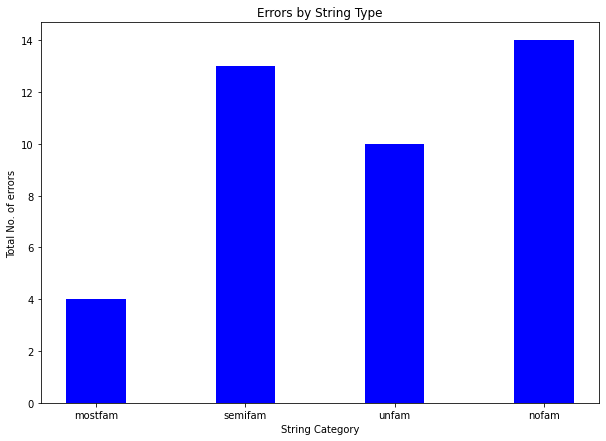

In [106]:
# plotting error count for fam an unfam
mostfam = ['there', 'about', 'right', 'think', 'would', 'where']
semifam = ['loyal', 'wagon', 'merry', 'motel', 'crawl', 'motor']
unfam = ['unhat', 'wooer', 'yeses', 'crape', 'incan', 'noire']
nofam = ['lumpo', 'reshy', 'blong', 'kremp', 'wovet', 'zarsh']

plt.figure(figsize=(10, 7))
plt.bar(['mostfam', 'semifam', 'unfam', 'nofam'], [len(mostfam_totalerror), len(semifam_totalerror), len(unfam_totalerror), len(nofam_totalerror)], color='blue',
        width=0.4)

plt.xlabel("String Category")
plt.ylabel("Total No. of errors")
plt.title("Errors by String Type")
plt.show()

In [107]:
# determining error edit distance for familiar vs unfamiliar terms
print('editdis for fam vs unfam')

mostfam_editdis = list(map(lambda trial: trial['editdis'], mostfam_error))
print(mostfam_editdis)
mostfam_error_editdis = list(filter(lambda trial: trial != 0, mostfam_editdis))
print(mostfam_error_editdis)
mostfam_error_editdisavg = np.mean(mostfam_error_editdis)
print(mostfam_error_editdisavg)

semifam_editdis = list(map(lambda trial: trial['editdis'], semifam_error))
print(semifam_editdis)
semifam_error_editdis = list(filter(lambda trial: trial != 0, semifam_editdis))
print(semifam_error_editdis)
semifam_error_editdisavg = np.mean(semifam_error_editdis)
print(semifam_error_editdisavg)

unfam_editdis = list(map(lambda trial: trial['editdis'], unfam_error))
print(unfam_editdis)
unfam_error_editdis = list(filter(lambda trial: trial != 0, unfam_editdis))
print(unfam_error_editdis)
unfam_error_editdisavg = np.mean(unfam_error_editdis)
print(unfam_error_editdisavg)

nofam_editdis = list(map(lambda trial: trial['editdis'], nofam_error))
print(nofam_editdis)
nofam_error_editdis = list(filter(lambda trial: trial != 0, nofam_editdis))
print(nofam_error_editdis)
nofam_error_editdisavg = np.mean(nofam_error_editdis)
print(nofam_error_editdisavg)

editdis for fam vs unfam
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 1, 1, 1]
1.5
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1]
1.0769230769230769
[6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
[6, 1, 1, 1, 2, 1, 1, 1, 1, 1]
1.6
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
1.0


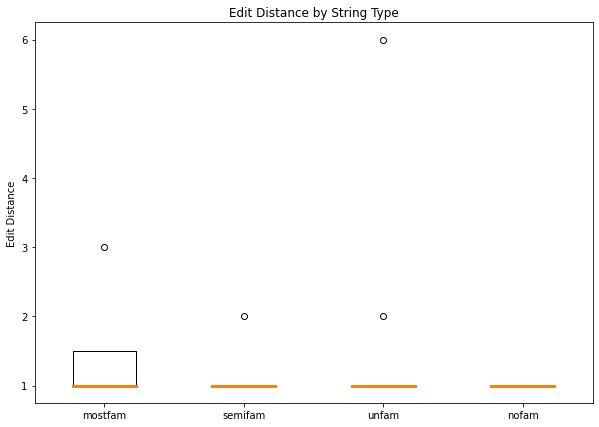

In [108]:
# plotting edit distance for fam and unfam
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([mostfam_error_editdis, semifam_error_editdis, unfam_error_editdis, nofam_error_editdis])

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

ax.set_xticklabels(['mostfam', 'semifam',
                    'unfam', 'nofam'])
for median in bp['medians']:
    median.set(linewidth = 3)

plt.ylabel("Edit Distance")
plt.title("Edit Distance by String Type")

plt.show()

In [109]:
# determining error for specific words
def word_error(word, fam_totalerror):
    x = list(filter(lambda trial: trial['string'] == word, fam_totalerror))
    return len(x)


plot_labels = []
plot_values = []
plot_colors = []

for word in mostfam:
    plot_labels.append(word)
    plot_values.append(word_error(word, mostfam_totalerror))
    plot_colors.append('red')

for word in semifam:
    plot_labels.append(word)
    plot_values.append(word_error(word, semifam_totalerror))
    plot_colors.append('blue')

for word in unfam:
    plot_labels.append(word)
    plot_values.append(word_error(word, unfam_totalerror))
    plot_colors.append('green')

for word in nofam:
    plot_labels.append(word)
    plot_values.append(word_error(word, nofam_totalerror))
    plot_colors.append('orange')

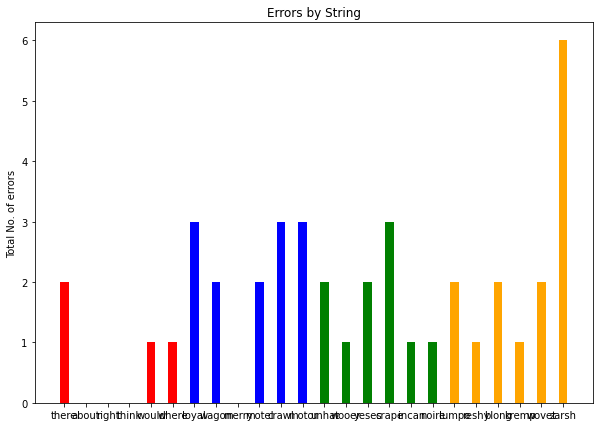

In [110]:
# bar chart for error by word
plt.figure(figsize=(10, 7))
plt.bar(plot_labels, plot_values, color=plot_colors,
        width=0.4)

plt.xlabel("")
plt.ylabel("Total No. of errors")
plt.title("Errors by String")
plt.show()

In [111]:
# edit distance for specific words
def word_totalerror (word, fam_totalerror):
    x = list(filter(lambda trial: trial['string'] == word, fam_totalerror))
    print(x)

word_totalerror('zarsh', nofam_totalerror)

[{'string': 'zarsh', 'input': 'xarsh', 'matches': False, 'editdis': 1}, {'string': 'zarsh', 'input': 'xzarsh', 'matches': False, 'editdis': 1}, {'string': 'zarsh', 'input': 'xzarsh', 'matches': False, 'editdis': 1}, {'string': 'zarsh', 'input': 'xarsh', 'matches': False, 'editdis': 1}, {'string': 'zarsh', 'input': 'xzarsh', 'matches': False, 'editdis': 1}, {'string': 'zarsh', 'input': 'zarsg', 'matches': False, 'editdis': 1}]


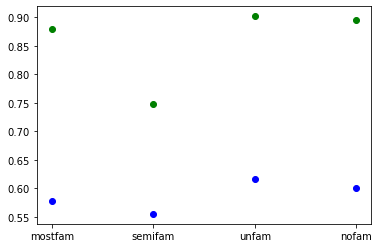

In [112]:
# onset delay comparison munashe / ian
x = ['mostfam', 'semifam', 'unfam', 'nofam']
ym = [mostfam_delayavg, semifam_delayavg, unfam_delayavg, nofam_delayavg]
yi = [0.578, 0.555, 0.617, 0.601]
munashe = plt.scatter(x, ym, c='green', label="munashe")
ian = plt.scatter(x, yi, c='blue', label= 'ian avg')

In [113]:
# ian delay onset values
mostfam_delayavg_ian = 0.578469283388971
0.5551477440322439
0.6177807336309342
0.601879311199203

0.601879311199203